# Analisis de los resultados de las pruebas saber 11 edicion 2018 a traves de tecnicas de mineria de datos

primero se importan las librerias necesarias

### import libs

In [0]:
import pandas as pd
import seaborn as sns; sns.set(style="whitegrid", font_scale=1.5)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline



### Lectura del Dataset

Luego para la lectura del dataset a traves de la libreria pandas como pd lo podemos leer, ya que en este caso es un .csv se lee con pd.read_csv

Fuera un .json o otro tipo de dataset la sintaxis no es que cambie mucho 

### json       pd.read_json()
### excel      pd.read_excel()
### sql        pd.read_sql()


hay que tener encuenta con que caracter estan separados los datos en este caso es con , y por ello se añade la sintaxis sep=','

low_memory=False    Es un parametro que funciona para la limpieza de los datos

In [0]:
url = 'Saber_11__2018-2.csv'
pruebasSaber11_df = pd.read_csv(url, sep=',', low_memory=False)



a traves de df.head(n) se puede mostrar las primeras filas del dataset


In [30]:
pruebasSaber11_df.head(10)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_ETNIA,ESTU_LIMITA_MOTRIZ,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_CODIGO_ICFES,...,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,CR,COLOMBIA,M,10/06/2002,20182,SB11201820408513,ESTUDIANTE,COLOMBIA,No,-,-,ATLANTICO,08,SOLEDAD,08758,Estrato 2,7 a 8,Cuatro,No sabe,No sabe,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,Si,Si,No,Si,No,No,Si,No,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,1 o 2 veces por semana,Igual,30 minutos o menos,Más de 3 horas,0,No,122432,...,OFICIAL,A,N,ACADÉMICO,108001002924,INST. EDUC. DIST. PARA EL DESARROLLO HUMANO M...,S,URBANO,MAÑANA,8001,BARRANQUILLA,8,ATLANTICO,N,8001,BARRANQUILLA,ATLANTICO,8,63,84,3,69,95,3,54,67,2,57,76,3,65.0,90,A2,305,85,2.0,53.169929,NSE3,PUBLICAR,NO
1,TI,COLOMBIA,M,22/10/2000,20182,SB11201820541500,ESTUDIANTE,COLOMBIA,No,-,-,CORDOBA,23,LORICA,23417,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Primaria completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,No,No,Si,No,11 A 25 LIBROS,Nunca o rara vez comemos eso,1 o 2 veces por semana,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,0,No,28704,...,OFICIAL,A,N,ACADÉMICO,123417001632,IE ANTONIO DE LA TORRE Y MIRANDA,S,URBANO,UNICA,23417,LORICA,23,CORDOBA,N,23417,LORICA,CORDOBA,23,54,54,3,50,48,2,50,53,2,40,28,1,48.0,46,A1,242,46,2.0,45.062853,NSE2,PUBLICAR,GENERACION E - GRATUIDAD
2,TI,COLOMBIA,M,19/12/2001,20182,SB11201820208467,ESTUDIANTE,COLOMBIA,No,-,-,VALLE,76,CALI,76001,Estrato 2,1 a 2,Dos,No sabe,Técnica o tecnológica incompleta,No sabe,Es vendedor o trabaja en atención al público,No,No,No,No,Si,No,No,No,26 A 100 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,30 minutos o menos,Entre 30 y 60 minutos,0,No,112466,...,OFICIAL,A,N,TÉCNICO/ACADÉMICO,276001010994,FRANCISCO JOSE LLOREDA MERA - SEDE PRINCIPAL,S,RURAL,MAÑANA,76001,CALI,76,VALLE,N,76001,CALI,VALLE,76,59,72,3,43,28,2,46,40,2,45,43,2,47.0,42,A-,241,45,2.0,44.806936,NSE2,PUBLICAR,GENERACION E - GRATUIDAD
3,TI,COLOMBIA,M,20/10/2000,20182,SB11201820514682,ESTUDIANTE,COLOMBIA,No,-,-,BOYACA,15,TUNJA,15001,Estrato 3,3 a 4,Tres,No sabe,Educación profesional completa,No sabe,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,No,Si,MÁS DE 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,Todos o casi todos los días,Igual,30 minutos o menos,Más de 3 horas,0,No,134692,...,NO O

### Definicion de variables o categorias 

Con .iloc es posible escoger unicamente las columnas o variables con las que se desea trabajar, haciendo esto a traves de la ubicacion de las variables primeramente seleccionando con : todas las filas y ya luego las columnas. Por ejemplo en este caso la variable ESTU_MCPIO_RESIDE se encuentra en la posicion 13.

In [31]:
pruebasSaber11_df = pruebasSaber11_df.iloc[:, [13,16, 22, 24, 64]]
pruebasSaber11_df.head(10)

,ESTU_MCPIO_RESIDE,FAMI_PERSONASHOGAR,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,PUNT_MATEMATICAS
0,SOLEDAD,7 a 8,Si,No,69
1,LORICA,5 a 6,Si,No,50
2,CALI,1 a 2,No,No,43
3,TUNJA,3 a 4,Si,Si,60
4,BOGOTÁ D.C.,7 a 8,Si,No,51
5,EL LITORAL DEL SAN JUAN,9 o más,-,No,35
6,URIBIA,7 a 8,No,No,49
7,PUERTO COLOMBIA,5 a 6,Si,Si,37
8,MARQUETALIA,5 a 6,No,No,63
9,DUITAMA,3 a 4,No,No,51


### Tipos de registros y valores nulos


In [32]:
assert pruebasSaber11_df.notnull().all().all()
pruebasSaber11_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549934 entries, 0 to 549933
Data columns (total 5 columns):
ESTU_MCPIO_RESIDE       549934 non-null object
FAMI_PERSONASHOGAR      549934 non-null object
FAMI_TIENEINTERNET      549934 non-null object
FAMI_TIENECOMPUTADOR    549934 non-null object
PUNT_MATEMATICAS        549934 non-null int64
dtypes: int64(1), object(4)
memory usage: 21.0+ MB


En PUNT_MATEMATICAS tenemos datos de tipo entero 
el resto de los registros son objetos


### Media a nivel global
Luego de ello se extrae la media a nivel global de la unica varable que tenemos en este caso PUNT_MATEMATICAS de tipo numerico

In [33]:
 pruebasSaber11_df['PUNT_MATEMATICAS'].mean()

50.191430244356596

# Seleccion de renglones

Se puede hacer la seleccion de renglones en los que se encuentre el municipio de Soacha 
A traves de .loc seleccionandolo en este caso por nombre a diferencia de .iloc que es por ubicacion 

In [0]:
pruebasSaber11_df_s = pruebasSaber11_df.set_index("ESTU_MCPIO_RESIDE", inplace=True)
pruebasSaber11_df_s = pruebasSaber11_df.loc['SOACHA']


In [27]:
pruebasSaber11_df_s.head()

,FAMI_PERSONASHOGAR,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,PUNT_MATEMATICAS
ESTU_MCPIO_RESIDE,,,,
SOACHA,5 a 6,Si,2,67
SOACHA,3 a 4,No,2,46
SOACHA,9 o más,Si,1,55
SOACHA,3 a 4,Si,1,55
SOACHA,3 a 4,Si,1,57


### Clustering

con .replace remplazamos si no - por valores numericos para poder hacer el clustering

In [0]:
df['FAMI_TIENECOMPUTADOR'] = df['FAMI_TIENECOMPUTADOR'].replace('Si',1).replace('No',2).replace('-',0)
df = pd.DataFrame(pruebasSaber11_df_s)

x = df['PUNT_MATEMATICAS'].values
y = df['FAMI_TIENECOMPUTADOR'].values

In [17]:
X = np.array(list(zip(x,y)))
print(X)

[[67  2]
 [46  2]
 [55  1]
 ...
 [52  2]
 [43  2]
 [51  2]]


In [0]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [0]:
colors = ["m. ", "r. ", "c. ", "y. ", "b. "]

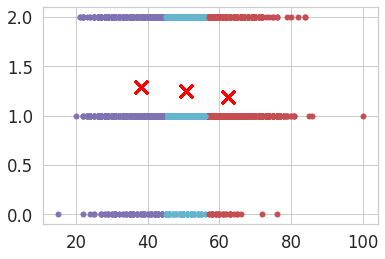

In [20]:
for i in range (len(X)):
  #print("Coordena: ", X[i], "Label: ", labels[i])
  plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)
  plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=150, linewidths=5, zorder=10, c='red')
  

### Media a nivel de Soacha

Luego de ello se extrae la media a nivel de soacha 

In [22]:
 pruebasSaber11_df_s['PUNT_MATEMATICAS'].mean()

51.16982131039047

Podemos ver una diferencia de un 1.0 entre la media global y la media del municipio de soacha 

### Total de datos en el puntaje de matematicas

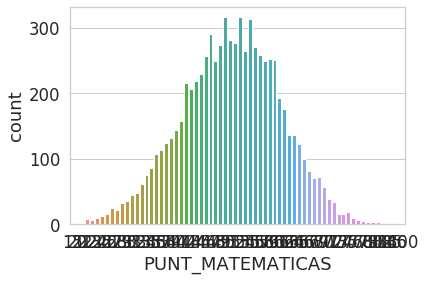

In [23]:
sns.countplot(data=pruebasSaber11_df_s, x="PUNT_MATEMATICAS")


### Familia tiene computador?

In [43]:
100 * pruebasSaber11_df_s['FAMI_TIENECOMPUTADOR'].value_counts() / len(pruebasSaber11_df_s['FAMI_TIENECOMPUTADOR'])

Si    71.396426
No    26.300463
-      2.303111
Name: FAMI_TIENECOMPUTADOR, dtype: float64

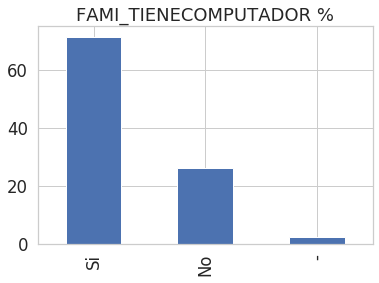

In [42]:
plot = (100 * pruebasSaber11_df_s['FAMI_TIENECOMPUTADOR'].value_counts() / len(pruebasSaber11_df_s['FAMI_TIENECOMPUTADOR'])).plot(
kind='bar', title='FAMI_TIENECOMPUTADOR %')

In [39]:
pd.crosstab(index=pruebasSaber11_df_s['FAMI_TIENECOMPUTADOR'], columns=pruebasSaber11_df_s['PUNT_MATEMATICAS'],
            margins=True).apply(lambda r: r/len(pruebasSaber11_df_s) *100,
                                axis=1)

PUNT_MATEMATICAS,15,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,84,85,86,100,All
FAMI_TIENECOMPUTADOR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-,0.013236,0.000000,0.000000,0.013236,0.000000,0.013236,0.026473,0.000000,0.039709,0.026473,0.039709,0.039709,0.079418,0.026473,0.026473,0.039709,0.119126,0.066181,0.052945,0.066181,0.079418,0.039709,0.079418,0.092654,0.066181,0.066181,0.066181,0.066181,0.052945,0.039709,0.079418,0.119126,0.079418,0.092654,0.052945,0.052945,0.052945,0.026473,0.026473,0.079418,0.052945,0.052945,0.039709,0.026473,0.052945,0.013236,0.026473,0.013236,0.000000,0.000000,0.000000,0.000000,0.000000,0.013236,0.000000,0.000000,0.000000,0.013236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.303111
No,0.000000,0.000000,0.026473,0.052945,0.013236,0.026473,0.066181,0.079418,0.119126,0.119126,0.172071,0.158835,0.198544,0.185308,0.264725,0.357379,0.423561,0.436797,0.423561,0.622105,0.542687,0.648577,0.675050,1.058901,0.873594,0.873594,1.058901,1.019193,1.164792,0.913302,0.939775,1.032429,1.085374,0.794176,1.111846,0.873594,0.794176,0.833885,0.754467,0.794176,0.754467,0.794176,0.595632,0.436797,0.317670,0.357379,0.317670,0.198544,0.172071,0.198544,0.145599,0.132363,0.066181,0.079418,0.013236,0.013236,0.026473,0.026473,0.000000,0.000000,0.013236,0.013236,0.000000,0.013236,0.026473,0.000000,0.000000,0.000000,26.300463
Si,0.000000,0.013236,0.000000,0.039709,0.066181,0.079418,0.066181,0.119126,0.172071,0.145599,0.225017,0.277962,0.304434,0.410324,0.516214,0.595632,0.595632,0.926539,1.019193,0.953011,1.125083,1.217737,1.336863,1.694242,1.786896,1.945731,1.906023,2.316347,2.634017,2.342819,2.607545,3.031105,2.554600,2.779616,3.017869,2.567836,3.309067,2.713435,2.634017,2.422237,2.528127,2.475182,1.906023,1.866314,1.442753,1.442753,1.283918,1.111846,0.913302,0.727995,0.807412,0.622105,0.436797,0.357379,0.198544,0.185308,0.225017,0.092654,0.092654,0.066181,0.039709,0.026473,0.039709,0.000000,0.000000,0.013236,0.013236,0.013236,71.396426
All,0.013236,0.013236,0.026473,0.105890,0.079418,0.119126,0.158835,0.198544,0.330907,0.291198,0.436797,0.476506,0.582396,0.622105,0.807412,0.992720,1.138319,1.429517,1.495698,1.641297,1.747187,1.906023,2.091330,2.845797,2.726671,2.885506,3.031105,3.401721,3.851754,3.295831,3.626737,4.182660,3.719391,3.666446,4.182660,3.494375,4.156188,3.573792,3.414957,3.295831,3.335539,3.322303,2.541363,2.329583,1.813369,1.813369,1.628061,1.323627,1.085374,0.926539,0.953011,0.754467,0.502978,0.450033,0.211780,0.198544,0.251489,0.132363,0.092654,0.066181,0.052945,0.039709,0.039709,0.013236,0.026473,0.013236,0.013236,0.013236,100.000000


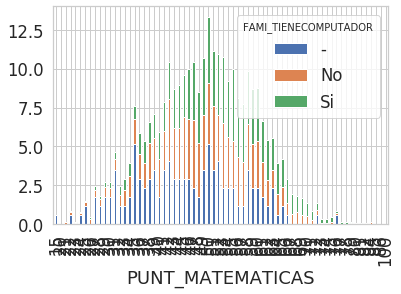

In [57]:
plot = pd.crosstab(index=pruebasSaber11_df_s['PUNT_MATEMATICAS'],
            columns=pruebasSaber11_df_s['FAMI_TIENECOMPUTADOR']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

### Familia tiene internet?


In [44]:
100 * pruebasSaber11_df_s['FAMI_TIENEINTERNET'].value_counts() / len(pruebasSaber11_df_s['FAMI_TIENEINTERNET'])

Si    74.692257
No    19.563203
-      5.744540
Name: FAMI_TIENEINTERNET, dtype: float64

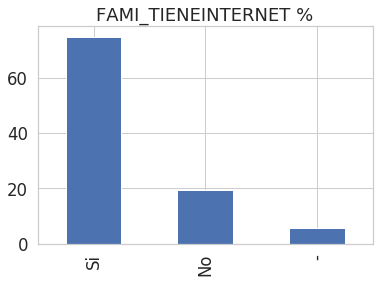

In [45]:
plot = (100 * pruebasSaber11_df_s['FAMI_TIENEINTERNET'].value_counts() / len(pruebasSaber11_df_s['FAMI_TIENEINTERNET'])).plot(
kind='bar', title='FAMI_TIENEINTERNET %')

In [46]:
pd.crosstab(index=pruebasSaber11_df_s['FAMI_TIENEINTERNET'], columns=pruebasSaber11_df_s['PUNT_MATEMATICAS'],
            margins=True).apply(lambda r: r/len(pruebasSaber11_df_s) *100,
                                axis=1)

PUNT_MATEMATICAS,15,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,84,85,86,100,All
FAMI_TIENEINTERNET,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-,0.013236,0.013236,0.013236,0.013236,0.026473,0.039709,0.026473,0.026473,0.026473,0.052945,0.079418,0.039709,0.119126,0.066181,0.079418,0.052945,0.211780,0.172071,0.172071,0.119126,0.238253,0.158835,0.132363,0.251489,0.185308,0.172071,0.092654,0.291198,0.185308,0.145599,0.158835,0.317670,0.172071,0.211780,0.185308,0.145599,0.145599,0.185308,0.145599,0.119126,0.119126,0.066181,0.092654,0.105890,0.079418,0.000000,0.066181,0.026473,0.026473,0.000000,0.013236,0.052945,0.026473,0.013236,0.013236,0.013236,0.000000,0.000000,0.000000,0.013236,0.000000,0.000000,0.000000,0.013236,0.000000,0.000000,0.000000,0.000000,5.744540
No,0.000000,0.000000,0.013236,0.039709,0.000000,0.039709,0.079418,0.079418,0.092654,0.039709,0.105890,0.119126,0.145599,0.172071,0.225017,0.317670,0.211780,0.330907,0.304434,0.516214,0.383852,0.436797,0.582396,0.714758,0.635341,0.622105,0.794176,0.675050,0.807412,0.741231,0.727995,0.701522,0.794176,0.727995,0.900066,0.688286,0.569159,0.582396,0.516214,0.635341,0.450033,0.569159,0.423561,0.383852,0.291198,0.264725,0.198544,0.145599,0.132363,0.158835,0.119126,0.105890,0.066181,0.052945,0.000000,0.013236,0.026473,0.039709,0.013236,0.013236,0.013236,0.000000,0.000000,0.000000,0.013236,0.000000,0.000000,0.000000,19.563203
Si,0.000000,0.000000,0.000000,0.052945,0.052945,0.039709,0.052945,0.092654,0.211780,0.198544,0.251489,0.317670,0.317670,0.383852,0.502978,0.622105,0.714758,0.926539,1.019193,1.005956,1.125083,1.310390,1.376572,1.879550,1.906023,2.091330,2.144275,2.435473,2.859034,2.409001,2.739907,3.163468,2.753144,2.726671,3.097287,2.660490,3.441430,2.806089,2.753144,2.541363,2.766380,2.686962,2.025149,1.839841,1.442753,1.548643,1.363336,1.151555,0.926539,0.767704,0.820649,0.595632,0.410324,0.383852,0.198544,0.172071,0.225017,0.092654,0.079418,0.039709,0.039709,0.039709,0.039709,0.000000,0.013236,0.013236,0.013236,0.013236,74.692257
All,0.013236,0.013236,0.026473,0.105890,0.079418,0.119126,0.158835,0.198544,0.330907,0.291198,0.436797,0.476506,0.582396,0.622105,0.807412,0.992720,1.138319,1.429517,1.495698,1.641297,1.747187,1.906023,2.091330,2.845797,2.726671,2.885506,3.031105,3.401721,3.851754,3.295831,3.626737,4.182660,3.719391,3.666446,4.182660,3.494375,4.156188,3.573792,3.414957,3.295831,3.335539,3.322303,2.541363,2.329583,1.813369,1.813369,1.628061,1.323627,1.085374,0.926539,0.953011,0.754467,0.502978,0.450033,0.211780,0.198544,0.251489,0.132363,0.092654,0.066181,0.052945,0.039709,0.039709,0.013236,0.026473,0.013236,0.013236,0.013236,100.000000


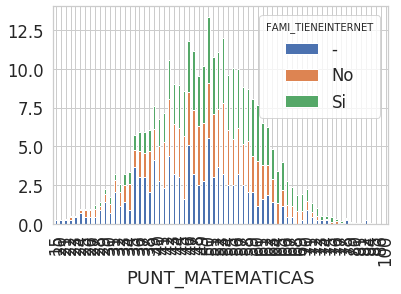

In [68]:
plot = pd.crosstab(index=pruebasSaber11_df_s['PUNT_MATEMATICAS'],
            columns=pruebasSaber11_df_s['FAMI_TIENEINTERNET']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

### Personas en el hogar


In [47]:
100 * pruebasSaber11_df_s['FAMI_PERSONASHOGAR'].value_counts() / len(pruebasSaber11_df_s['FAMI_PERSONASHOGAR'])

3 a 4      52.296492
5 a 6      30.112508
1 a 2       7.253475
7 a 8       5.784249
9 o más     2.329583
-           2.223693
Name: FAMI_PERSONASHOGAR, dtype: float64

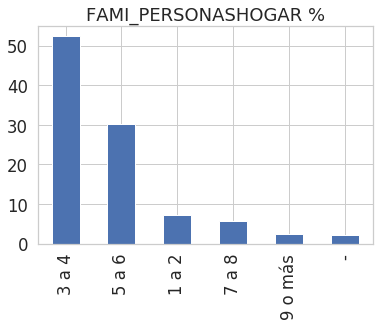

In [49]:
plot = (100 * pruebasSaber11_df_s['FAMI_PERSONASHOGAR'].value_counts() / len(pruebasSaber11_df_s['FAMI_PERSONASHOGAR'])).plot(
kind='bar', title='FAMI_PERSONASHOGAR %')

In [50]:
pd.crosstab(index=pruebasSaber11_df_s['FAMI_PERSONASHOGAR'], columns=pruebasSaber11_df_s['PUNT_MATEMATICAS'],
            margins=True).apply(lambda r: r/len(pruebasSaber11_df_s) *100,
                                axis=1)

PUNT_MATEMATICAS,15,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,84,85,86,100,All
FAMI_PERSONASHOGAR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-,0.013236,0.000000,0.000000,0.013236,0.000000,0.013236,0.013236,0.000000,0.026473,0.013236,0.026473,0.026473,0.066181,0.026473,0.039709,0.013236,0.105890,0.052945,0.039709,0.052945,0.079418,0.066181,0.092654,0.092654,0.092654,0.066181,0.052945,0.052945,0.066181,0.026473,0.092654,0.119126,0.092654,0.105890,0.052945,0.039709,0.052945,0.026473,0.026473,0.079418,0.052945,0.052945,0.039709,0.026473,0.066181,0.000000,0.026473,0.013236,0.000000,0.000000,0.000000,0.000000,0.000000,0.013236,0.000000,0.000000,0.000000,0.013236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.223693
1 a 2,0.000000,0.013236,0.000000,0.026473,0.026473,0.000000,0.013236,0.039709,0.052945,0.079418,0.066181,0.026473,0.039709,0.052945,0.079418,0.105890,0.132363,0.132363,0.105890,0.185308,0.198544,0.145599,0.132363,0.317670,0.211780,0.225017,0.198544,0.225017,0.264725,0.211780,0.277962,0.238253,0.264725,0.158835,0.211780,0.225017,0.304434,0.251489,0.198544,0.251489,0.185308,0.225017,0.198544,0.211780,0.105890,0.092654,0.066181,0.039709,0.079418,0.092654,0.052945,0.039709,0.066181,0.000000,0.000000,0.000000,0.039709,0.013236,0.000000,0.000000,0.013236,0.013236,0.013236,0.000000,0.000000,0.000000,0.013236,0.000000,7.253475
3 a 4,0.000000,0.000000,0.000000,0.013236,0.026473,0.039709,0.079418,0.092654,0.132363,0.119126,0.172071,0.251489,0.185308,0.317670,0.410324,0.410324,0.410324,0.727995,0.807412,0.727995,0.608868,0.807412,1.072138,1.323627,1.336863,1.376572,1.628061,1.773660,2.078094,1.892786,1.707478,2.170748,1.800132,1.919259,2.276638,1.853077,2.236929,2.038385,1.958968,1.760424,1.826605,1.813369,1.389808,1.389808,1.178028,1.111846,0.979484,0.820649,0.582396,0.516214,0.529451,0.410324,0.251489,0.238253,0.172071,0.105890,0.158835,0.066181,0.039709,0.052945,0.026473,0.013236,0.026473,0.013236,0.013236,0.013236,0.000000,0.013236,52.296492
5 a 6,0.000000,0.000000,0.013236,0.039709,0.013236,0.066181,0.039709,0.039709,0.052945,0.039709,0.092654,0.132363,0.225017,0.172071,0.185308,0.344143,0.370615,0.370615,0.436797,0.476506,0.675050,0.675050,0.622105,0.833885,0.741231,0.953011,0.926539,1.019193,1.217737,0.926539,1.217737,1.350099,1.244209,1.217737,1.389808,1.164792,1.270682,1.045665,0.913302,0.900066,1.005956,0.939775,0.714758,0.542687,0.357379,0.410324,0.463269,0.436797,0.383852,0.264725,0.317670,0.251489,0.145599,0.185308,0.026473,0.079418,0.026473,0.039709,0.052945,0.013236,0.013236,0.013236,0.000000,0.000000,0.013236,0.000000,0.000000,0.000000,30.112508
7 a 8,0.000000,0.000000,0.013236,0.000000,0.000000,0.000000,0.013236,0.013236,0.026473,0.039709,0.066181,0.039709,0.039709,0.052945,0.066181,0.092654,0.079418,0.092654,0.092654,0.119126,0.092654,0.198544,0.119126,0.185308,0.251489,0.172071,0.172071,0.251489,0.158835,0.172071,0.185308,0.185308,0.198544,0.198544,0.172071,0.185308,0.198544,0.132363,0.225017,0.198544,0.185308,0.198544,0.185308,0.132363,0.092654,0.158835,0.066181,0.000000,0.039709,0.039709,0.039709,0.039709,0.039709,0.013236,0.013236,0.013236,0.026473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.784249
9 o más,0.000000,0.000000,0.000000,0.013236,0.013236,0.000000,0.000000,0.013236,0.039709,0.000000,0.013236,0.000000,0.026473,0.000000,0.026473,0.026473,0.039709,0.052945,0.013236,0.079418,0.092654,0.013236,0.052945,0.092654,0.092654,0.092654,0.052945,0.079418,0.066181,0.066181,0.145599,0.119126,0.119126,0.066181,0.079418,0.026473,0.092654,0.079418,0.092654,0.105890,0.079418,0.092654,0.013236,0.026473,0.013236,0.039709,0.026473,0.013236,0.000000,0.013236,0.013236,0.013236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

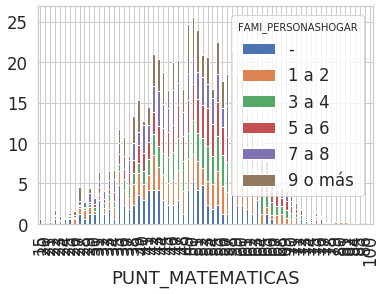

In [41]:
plot = pd.crosstab(index=pruebasSaber11_df_s['PUNT_MATEMATICAS'],
            columns=pruebasSaber11_df_s['FAMI_PERSONASHOGAR']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)